<a href="https://colab.research.google.com/github/iam-pattan/Fuzzy_and_GANs/blob/main/LR_GenPelletizer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [1]:
from google.colab import files
uploaded = files.upload()

Saving genenrated_GAN.xlsx to genenrated_GAN.xlsx


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# df = pd.read_excel('/content/genenrated_VAE2.xlsx')
df = pd.read_excel('/content/genenrated_GAN.xlsx')
df.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3
0,388,48,58,46.404229,2,10,27,4,6,48
1,2190,38,81,40.218866,29,9,29,22,25,34
2,1439,21,40,31.490149,2,5,24,21,1,18
3,1631,43,93,46.944573,1,5,43,11,11,71
4,602,26,90,78.820640,0,14,-2,3,8,79


# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.fit_transform(df)
pca.explained_variance_ratio_

array([9.91986657e-01, 2.39503594e-03, 1.59366068e-03, 1.49128947e-03,
       1.01728421e-03, 8.45590539e-04, 3.76677805e-04, 2.32031063e-04,
       6.17729616e-05, 3.65195145e-35])

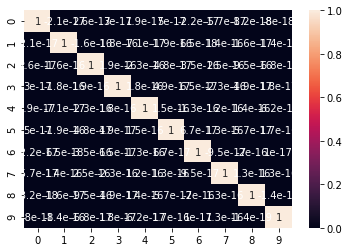

In [ ]:
pca_comp = pd.DataFrame(pca.fit_transform(df))
sns.heatmap(pca_comp.corr(), annot=True)

## Feature selection

In [ ]:
>>> from sklearn.svm import LinearSVC
>>> from sklearn.datasets import load_iris
>>> from sklearn.feature_selection import SelectFromModel
>>> X, y = df.iloc[:, 1:], df.iloc[:, 0]
>>> X.shape
>>> lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
>>> model = SelectFromModel(lsvc, prefit=True).transform(X)

In [ ]:
lsvc.score

<bound method ClassifierMixin.score of LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)>

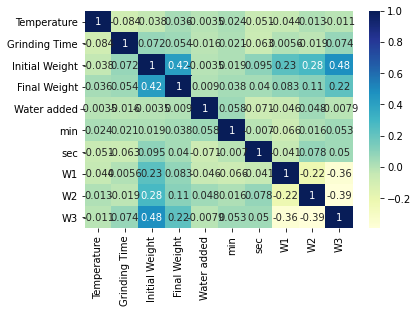

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

# Pre-processing

In [4]:
std = MinMaxScaler()
df = pd.DataFrame(std.fit_transform(df))

In [5]:
import numpy as np

X = pd.concat([df.iloc[:, -3:], df.iloc[:, 4]], axis=1)
y = df.iloc[:, 0]

In [6]:
X.shape, y.shape

((474, 4), (474,))

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2ff0666d0>,
       dtype=object),
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa2ff02dbd0>)

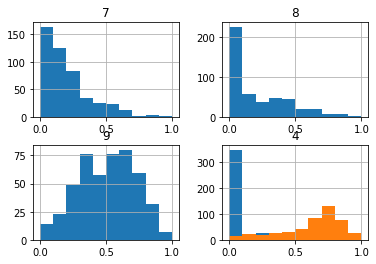

In [7]:
X.hist(), y.hist()

In [ ]:
# # standardize/normalize data
# std = MinMaxScaler()
# X_scaled = std.fit_transform(X)
# y_scaled = std.fit_transform(y.values.reshape(-1,1)) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

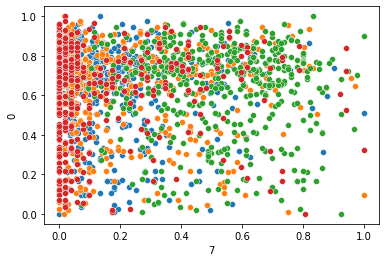

In [ ]:
sns.scatterplot(X[7], y)
sns.scatterplot(X[8], y)
sns.scatterplot(X[9], y)
sns.scatterplot(X[4], y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


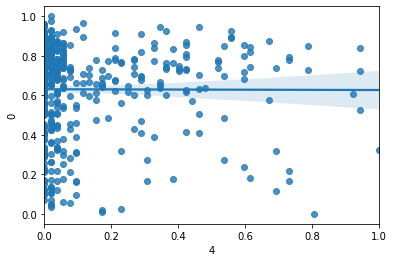

In [ ]:
sns.regplot(X[4], y)

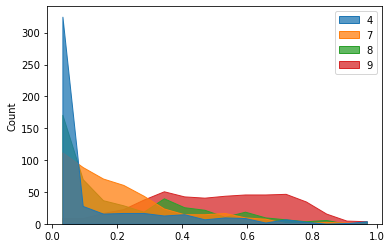

In [ ]:
sns.histplot(X, element='poly')

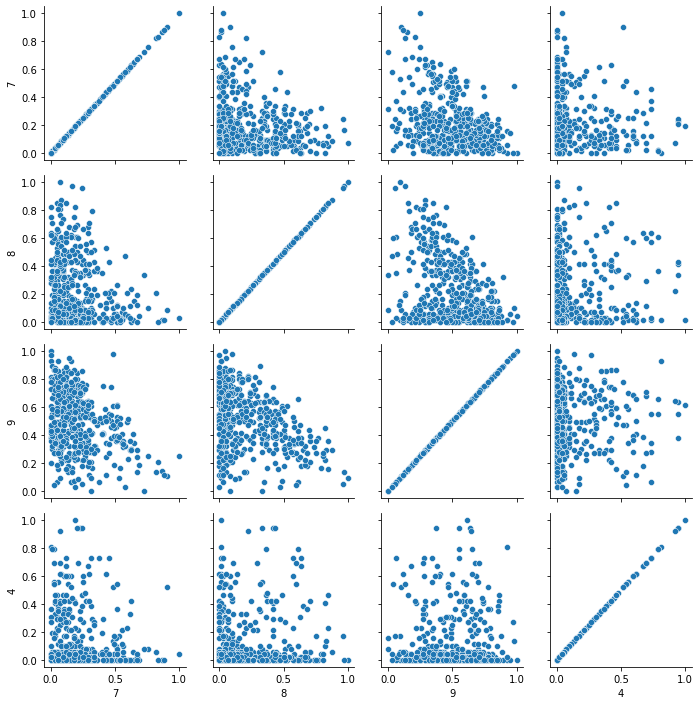

In [ ]:
g = sns.PairGrid(X)
g.map(sns.scatterplot)

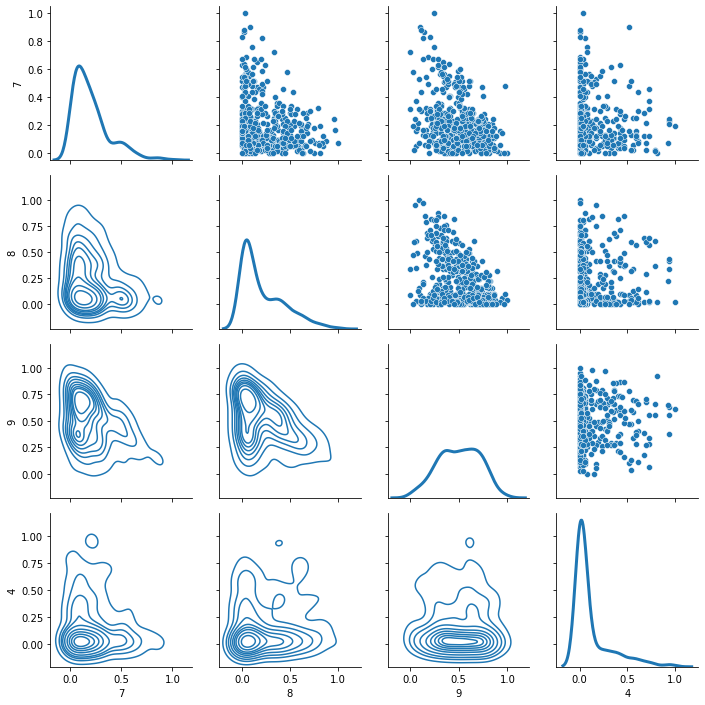

In [ ]:
g = sns.PairGrid(X)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Replacing infinite with nan
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
y_train.dropna(inplace=True)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((355, 4), (355,), (119, 4), (119,))

In [ ]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train, y_train)

In [ ]:
lin_reg.rank_

4

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.coef_

array([-0.11124437, -0.00949134, -0.04855841, -0.01317771])

In [ ]:
model.intercept_

0.6791822937164114

In [ ]:
model.score(x_test, y_pred)

1.0

In [ ]:
# scores
mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)

(0.05323320765538476, 0.18172513488819947, -0.011556231159947528)

In [ ]:
# adjusted R-squared
1 - (1-model.score(x_test, y_test)) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

-0.047049432253279067

In [ ]:
1 - (1-model.score(x_train, y_train)) * (len(y_train) - 1) / (len(y_train) - x_train.shape[1] - 1)

-0.005066849880974722

# Stats Reg


In [ ]:
from scipy.stats import linregress

slope, intercept, r, p, se = linregress(X[7], y)

In [ ]:
slope, intercept, r, p, se

(-0.05507302272383706,
 0.6415128467522857,
 -0.043524991805077885,
 0.3443769868879445,
 0.058185859921233034)

# GLM (Generalized Linear Models for spl. kind of data)


GLM models allow us to build a linear relationship between the response and predictors, even though their underlying relationship is not linear. This is made possible by using a link function.

[Interpretation Explained](https://www.youtube.com/watch?v=G5xIFdLL5Ic)

In [ ]:
import pandas as pd 
import statsmodels.api as sm 

count_model = sm.GLM(y_train, sm.add_constant(x_train), family=sm.families.Poisson(sm.genmod.families.links.log)).fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


In [ ]:
count_model.summary()   #Poission

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  355
Model:                            GLM   Df Residuals:                      350
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -296.03
Date:                Sun, 11 Jul 2021   Deviance:                       35.927
Time:                        09:24:19   Pearson chi2:                     28.6
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3840      0.320     -1.201      0.230      -1.011       0.243
7             -0.1792      0.446     -0.402      0.688      -1.053       0.695
8             -0.0150      0.356     -0.042      0.966      -0.713       0.683
9             -0.0768      0.400     -0.192      0.848      -0.861       0.707
4             -0.0207      0.349     -0.059      0.953      -0.704       0.663
==============================================================================
"""

In [ ]:
count_model = sm.GLM(y_train, sm.add_constant(x_train), family=sm.genmod.families.family.Tweedie(sm.genmod.families.links.log, eql=True)).fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


In [ ]:
count_model.summary()   #Tweedie

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1492: RuntimeWarning: divide by zero encountered in log
  u = endog * np.log(endog / mu) - (endog - mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1492: RuntimeWarning: invalid value encountered in multiply
  u = endog * np.log(endog / mu) - (endog - mu)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  355
Model:                            GLM   Df Residuals:                      350
Model Family:                 Tweedie   Df Model:                            4
Link Function:                    log   Scale:                        0.081641
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 11 Jul 2021   Deviance:                       35.927
Time:                        09:22:22   Pearson chi2:                     28.6
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3840      0.091     -4.202      0.000      -0.563      -0.205
7             -0.1792      0.127     -1.406      0.160      -0.429       0.071
8             -0.0150      0.102     -0.147      0.883      -0.214       0.184
9             -0.0768      0.114     -0.672      0.502      -0.301       0.147
4             -0.0207      0.100     -0.208      0.835      -0.216       0.175
==============================================================================
"""

# Decision Tree

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR = DecisionTreeRegressor(max_depth=2)

In [ ]:
model = DTR.fit(x_train, y_train)

In [ ]:
model.feature_importances_

array([0.42246004, 0.57753996, 0.        , 0.        ])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# model.score(x_test, y_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.027846020204195687

[Text(334.79999999999995, 362.4, 'X[1] <= 0.986\nmse = 0.051\nsamples = 355\nvalue = 0.628'),
 Text(223.2, 217.44, 'X[0] <= 0.307\nmse = 0.05\nsamples = 354\nvalue = 0.629'),
 Text(111.6, 72.47999999999996, 'mse = 0.048\nsamples = 278\nvalue = 0.642'),
 Text(334.79999999999995, 72.47999999999996, 'mse = 0.056\nsamples = 76\nvalue = 0.583'),
 Text(446.4, 217.44, 'mse = 0.0\nsamples = 1\nvalue = 0.096')]

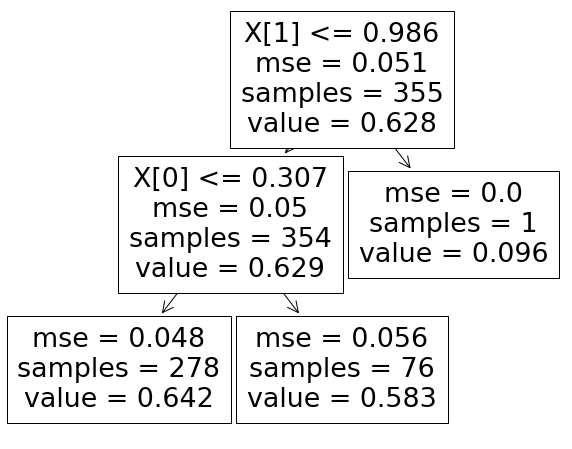

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
# tree.export_text(model)
tree.plot_tree(model)

In [ ]:
!pip install dtreeviz

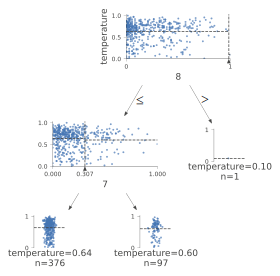

<Figure size 1440x720 with 0 Axes>

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

fig = plt.figure(figsize=(20,10))
viz = dtreeviz(model, X, y,
                target_name="temperature",
                feature_names=X.columns
               )
viz

# RandomForestRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfr.feature_importances_

array([0.26846899, 0.27026011, 0.2734283 , 0.1878426 ])

In [ ]:
rfr.score(x_test, y_test)

-0.1464029488496874

# ExtraTreesRegressor
Extremely randomized tree

In [ ]:
etr = ExtraTreesRegressor()

In [ ]:
etr.fit(x_train, y_train)

In [ ]:
etr.feature_importances_

array([0.27495041, 0.25858816, 0.25612849, 0.21033294])

In [ ]:
etr.score(x_test, y_test)

-0.17531262344396392

# SVM (SVR)

In [9]:
from sklearn.svm import SVR

In [10]:
svr = SVR(C=1.0, epsilon=0.2).fit(x_train, y_train)

In [25]:
svr.intercept_, svr.dual_coef_, svr.get_params

(array([0.60276906]),
 array([[-1.        ,  0.0864311 , -1.        , -1.        , -1.        ,
         -1.        ,  0.47260305,  1.        ,  0.27791015, -1.        ,
          0.49851987, -1.        ,  1.        , -0.49539892, -1.        ,
         -0.35351649,  0.63879279,  1.        ,  1.        ,  1.        ,
          1.        ,  0.10373059,  1.        , -1.        , -1.        ,
          0.60619122, -0.68500163,  0.60618688,  1.        ,  1.        ,
          0.13825363,  0.34958011,  1.        ,  1.        ,  1.        ,
         -1.        ,  1.        , -1.        ,  1.        ,  1.        ,
         -1.        , -1.        , -1.        ,  0.39338382,  0.80050176,
         -0.9474269 ,  1.        ,  1.        ,  0.93816922,  1.        ,
          1.        ,  0.97683075,  1.        ,  1.        ,  1.        ,
          0.2248292 ,  1.        ,  1.        ,  0.36160997,  1.        ,
         -1.        , -1.        , -1.        ,  1.        , -1.        ,
         -1.    

In [11]:
svr.score(x_test, y_test)

-0.02805711606229488

# K-means 

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
km.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.score(x_test)

-5.706000258998202

In [ ]:
import numpy as np

centroids = km.cluster_centers_
u_labels = [1,2,3]

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# ANN